### Log and Facies Plot

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
file = 'F02-1_logs.las'
data = np.loadtxt(file,skiprows=35)
data[data==-999.2500]=np.nan
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_rel', 'PHIE']
data = pd.DataFrame(data,columns=mneumonics)
data = data[['DEPTH', 'RHOB', 'DT', 'GR']]
tb = [0,464, 539, 612, 635, 687, 702, 795, 814, 926, 949, 1026, 1053, 1095, 1133, 1270, 1297, 1430, 2000]
f = [1, 2, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1]
depth = data.DEPTH.values
data.head()

,DEPTH,RHOB,DT,GR
0,48.00,NaN,524.0485,NaN
1,48.15,NaN,524.0410,NaN
2,48.30,NaN,524.0336,NaN
3,48.45,NaN,524.0262,NaN
4,48.60,NaN,524.0190,NaN


In [17]:
facies = []
for i in range(len(depth)):
	for j in range(len(tb)-1):
		if depth[i]>tb[j] and depth[i] <=tb[j+1]:
			facies.append(f[j])
data['FACIES']= facies
data.to_csv('well.csv', index=False)
print(data)

          DEPTH       RHOB        DT       GR  FACIES
0       48.0000        NaN  524.0485      NaN       1
1       48.1500        NaN  524.0410      NaN       1
2       48.3000        NaN  524.0336      NaN       1
3       48.4500        NaN  524.0262      NaN       1
4       48.6000        NaN  524.0190      NaN       1
...         ...        ...       ...      ...     ...
9675  1499.2500  1787.5444  532.1727  27.6273       1
9676  1499.4000  1814.1691  534.8610  28.5281       1
9677  1499.5500  1861.6497  537.1902  28.5813       1
9678  1499.7001  1880.3978  537.2630  28.5813       1
9679  1499.8501  1856.3350  537.3831  27.9759       1

[9680 rows x 5 columns]


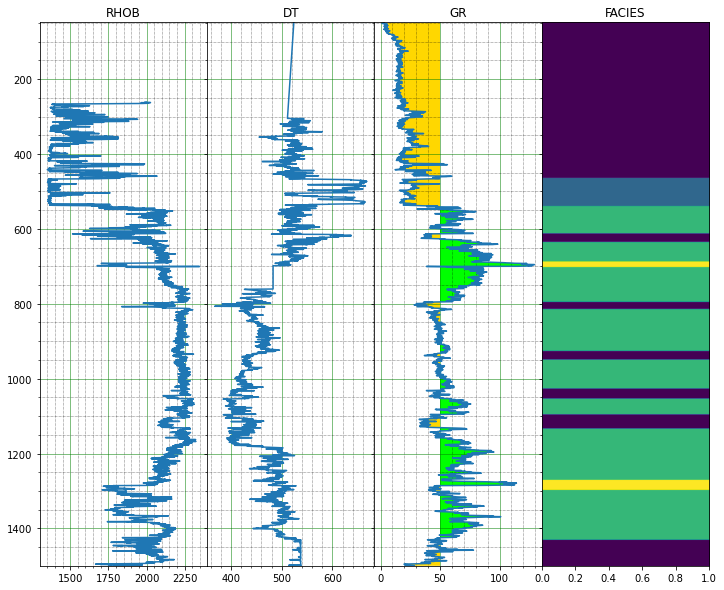

In [18]:
data = data.values
rows, cols = 1, 4
fig, ax = plt.subplots(nrows= rows, ncols=cols, figsize=(12, 10), sharey=True)
mneumonics = ['RHOB', 'DT', 'GR', 'FACIES']
for i in range(cols):
	if i < cols-1:
		ax[i].plot(data[:,i+1], data[:,0])
		ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
		ax[i].minorticks_on()
		ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
		ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
		ax[i].set_title('%s' %mneumonics[i])
	elif i == cols-1:
		F = np.vstack((facies,facies)).T
		ax[i].imshow(F, aspect='auto', extent=[0, 1, max(data[:,0]), min(data[:,0])])
		ax[i].set_title('%s' %mneumonics[i])
    
y2 = data[:, 3]
y1 = y2*0+50
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1>=y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1<y2), color='lime', linewidth=0)

plt.subplots_adjust(wspace=0)
plt.show()